# Diabetes detection model

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii 61142865
* Michelle Sui 93853489

# Introduction

Diabetes is a chronic (long-lasting) health condition that affects how body turns food into energy. Body breaks down most of the food people eat into sugar (glucose) and releases it into the bloodstream. When the blood sugar goes up, it signals the pancreas to release insulin. Insulin acts like a key to let the blood sugar into the body’s cells for use as energy. However, with diabetes, patient's body doesn’t make enough insulin or can’t use it as well as it should. Moreover, gestational diabetes develops in pregnant women who have never had diabetes. If a patient have gestational diabetes, their baby could be at higher risk for health problems. Gestational diabetes usually goes away after your baby is born. However, it increases a patient's risk for type 2 diabetes later in life. (Center for Disease Control and Prevention, 2023) 

Early diagnosis and intervention can significantly alter the course of this disease, improving the quality of life for those affected. Recognizing the critical role of timely and accurate diagnostics, our project is inspired by a dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. This data provides a unique opportunity to utilize machine learning for predictive analysis in a medical context.
The dataset focuses on a specific subset of the population - women of Pima Indian heritage who are 21 years or older. It includes several medical predictor variables alongside one target variable, Outcome, indicating the presence or absence of diabetes. Our project aims to leverage the capabilities of artificial intelligence and data analytics to **develop a robust model that can predict the onset of diabetes in patients based on the diagnostic measurements provided in the dataset.** By doing so, we seek not only to contribute to the advancement of medical diagnostics but also to support preventive health measures among high-risk populations.



# Data Description:

For our research, we are using the data from Kaggle, which was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases.to predict if a patient from a group of 21 years and older women of Pima Indian heritage will have diabetes based on the next factors, which can be found as columns in the original comma separated valuetable:
* **Pregnancies**: the number of times pregnant
* **Glucose**:  plasma glucose concentration
* **BloodPressure**: diastolic blood pressure (in mmHg)
* **SkinThickness**: triceps skin fold thickness (mm) 
* **Insulin**: 2-hour serum insulin (in U/ml)
* **BMI**: body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: diabetes pedigree function 
* **Age**: age (in years)
* **Outcome**: 0 or 1 (0 means that a patient does not have diabetes, 1 means that a patient has)

# Methods
### 1. Preprocessing and exploratory data analysis
**1). Loads data from the original source on the web**

Read the data using `read_csv` and imported necessary libraries like `tidyverse` and `tidymodels`.

**2). Wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis**

Rename variable names by standardizing them to lowercase for consistency, then converting `outcome` to a factor with `as_factor` function as we are working on a categorical question. 

**3). Sets the seed value and splits the data into training and testing sets, working only with the training set until the very end.**

The seed value remains unchanged in this report. And we will use 70% of the data for training and 30% for testing.

**4). Performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis.**

According to our proposal, we found that cases where it is '0' are almost twice as common as cases where it is '1,' indicating a data imbalance. We will use the `upsample` function when creating the recipe.

Missing data was prevalent in two factors: insulin and skin_thickness. We have concluded that these factors cannot play a predictor role in the final analysis.

In every other factors, the amount of missing data was less than 1%. we have selected the following six quantitative variables as our predictors.
* `Pregnancies`: the number of times pregnant
* `Glucose`:  plasma glucose concentration
* `BloodPressure`: diastolic blood pressure (in mmHg)
* `BMI`: body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction`: diabetes pedigree function 
* `Age`: age (in years)

**5). Visualizes the distribution of each variable**

Create histograms to visualize the distribution of key predictor variables. And by distinguishing different groups with colors, we can more intuitively see the distribution characteristics of predictors across different groups.

### 2. Performs the data analysis
**1). Set up cross-validation to increase the accuracy**

Perform a 8-fold cross validation with K values ranging from 1 to 50, the increment is 1. We chose ranges from 1- 50 since we believe it is a wide enough range to find a good K value and chose to use 8 folds since it is enough accuraccy for out project.

**2). Create classification recipe and make the training data centered and scaled**

Standardize the above variables because they were not originally on a comparable scale. Additionally, use an `upsample` function to adjust the cases where the outcome is 1 to be equal in number to those where it is 0, by specifying the argument `over_ratio = 1`.

**3). Find the best K value by using `neighbours = tune()` in the k-nearest model function**

**4). Plot the results/accuracies of the K values**

Use ggplot to plot the accuracy corresponding to different k values.

**5). Train our classification model with the best k value**

We will use the best k value to train our classification model.

### 3. Testing the model

### 4. Evaluating model's performance
Comparing our predictions against the actual diagnoses, we can compute accuracy, precision, recall and confusion matrix.

# Expected Results:
We expect to discover a relationship between our six predictor variables and the onset of diabetes. This classifier could significantly influence the early identification of diabetes, enabling sooner interventions and improved preventive measures. Moreover, this project may serve as a foundation for additional studies aimed at creating more precise diabetes classification models, for instance, through extended exploration of pertinent predictor variables.

# Code:
## 1. Preliminary exploratory data analysis
**1). Loads data from the original source on the web**

In [1]:
#Import libraries
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(recipes)
#it takes longer than usual when intall 'themis'
install.packages("themis")
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
#Uploaded the raw dataset to GitHub, stored the URL in the URL variable, and then read the data using read_csv. 
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes_data <- read_csv(URL)
head(diabetes_data)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


**2). Wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis**

In [4]:
# rename colunms to lowercase
diabetes <- rename(diabetes_data,
                 pregnancies =  Pregnancies,
                 glucose = Glucose,
                 blood_pressure = BloodPressure,
                 skin_thickness = SkinThickness,
                 insulin = Insulin,
                 bmi = BMI,
                 diabetes_pedigree_function = DiabetesPedigreeFunction,
                 age = Age,
                 outcome = Outcome)
#convert outcome to a factor
diabetes <- diabetes |>
    mutate(outcome = as_factor(outcome))

head(diabetes)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


**3). Set the seed value and split the data into training and testing sets, working only with the training set until the very end**

#### a) Set seed value

In [5]:
#set seed value to make our results reproducible.
set.seed(123) #do not change the value.

#### b) Split the data

In [6]:
#Here we use 70% of the data for training and 30% for testing.
diabetes_split <- initial_split(diabetes, prop = 0.7, strata = outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)
glimpse(diabetes_test)

Rows: 537
Columns: 9
$ pregnancies                <dbl> 1, 10, 4, 1, 1, 13, 5, 3, 10, 7, 7, 7, 1, 2…
$ glucose                    <dbl> 89, 115, 110, 103, 97, 145, 109, 88, 122, 1…
$ blood_pressure             <dbl> 66, 0, 92, 30, 66, 82, 75, 58, 78, 84, 92, …
$ skin_thickness             <dbl> 23, 0, 0, 38, 15, 19, 26, 11, 31, 0, 18, 0,…
$ insulin                    <dbl> 94, 0, 0, 83, 140, 110, 0, 54, 0, 0, 0, 0, …
$ bmi                        <dbl> 28.1, 35.3, 37.6, 43.3, 23.2, 22.2, 36.0, 2…
$ diabetes_pedigree_function <dbl> 0.167, 0.134, 0.191, 0.183, 0.487, 0.245, 0…
$ age                        <dbl> 21, 29, 30, 33, 22, 57, 60, 22, 45, 37, 48,…
$ outcome                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 231
Columns: 9
$ pregnancies                <dbl> 6, 1, 8, 5, 10, 5, 1, 3, 8, 7, 9, 10, 7, 5,…
$ glucose                    <dbl> 148, 85, 183, 116, 139, 166, 115, 126, 99, …
$ blood_pressure             <dbl> 72, 66, 64, 74, 80, 72, 70, 88, 84, 90, 80,

**4). Performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis**

In [7]:
#the number of observations in each group
num_obs <- nrow(diabetes_train)
diabetes_outcomes <- diabetes_train |>
                    group_by(outcome) |>
                    summarize(count = n(), percentage = n() / num_obs * 100)

diabetes_outcomes

outcome,count,percentage
<fct>,<int>,<dbl>
0,350,65.17691
1,187,34.82309


In our training set, we have 350 observations with `outcome = 0`, and 187 observations with `outcome = 1`. The number of patients without diabetes is greater than the number of patients with diabetes which causes a class imbalance, which could potentially impact the predictions of our model. We plan to incorporate oversampling method into the recipe creation process to address this issue.

In [8]:
# the means of the variables
diabetes_stat <- diabetes_train |>
                    group_by(outcome) |>
    summarize(across(pregnancies:age, mean))
diabetes_stat

outcome,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3.322857,110.1514,67.79429,19.98571,66.58857,30.66571,0.4202371,30.99429
1,4.673797,139.5508,69.77540,22.04813,104.70588,35.59947,0.5669037,37.16043


In [9]:
# the number of observations have missing values
# pregnancies can be 0
# 0 represents missing values for other numerical variables
diabetes_missing <- diabetes_train |>
    filter(glucose == 0 | blood_pressure == 0 | skin_thickness == 0 | insulin == 0 | bmi == 0 | diabetes_pedigree_function == 0 | age == 0)
head(diabetes_missing)
diabetes_missing_num <- diabetes_missing |>
  summarize(missing_count_total = n())
diabetes_missing_num
zero_counts <- diabetes_train |>
  summarize(across(pregnancies:age, ~ sum(. == 0))) |> pivot_longer(cols = glucose:age, names_to = "variable", values_to = "count_missing")
zero_counts

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
5,109,75,26,0,36.0,0.546,60,0
10,122,78,31,0,27.6,0.512,45,0
7,133,84,0,0,40.2,0.696,37,0
7,106,92,18,0,22.7,0.235,48,0


missing_count_total
<int>
261


pregnancies,variable,count_missing
<int>,<chr>,<int>
79,glucose,4
79,blood_pressure,30
79,skin_thickness,156
79,insulin,259
79,bmi,7
79,diabetes_pedigree_function,0
79,age,0


We have 261 records with missing values, among which 259 contain missing values for `insulin` and 156 for `skin_thickness`. Due to the high number of missing values in these two variables, we do not currently intend to use them as predictors. For the rest of the missing values, since they involve a small amount of data, we'll exclude those rows during model training.

**5). Visualizes the distribution of each variable**

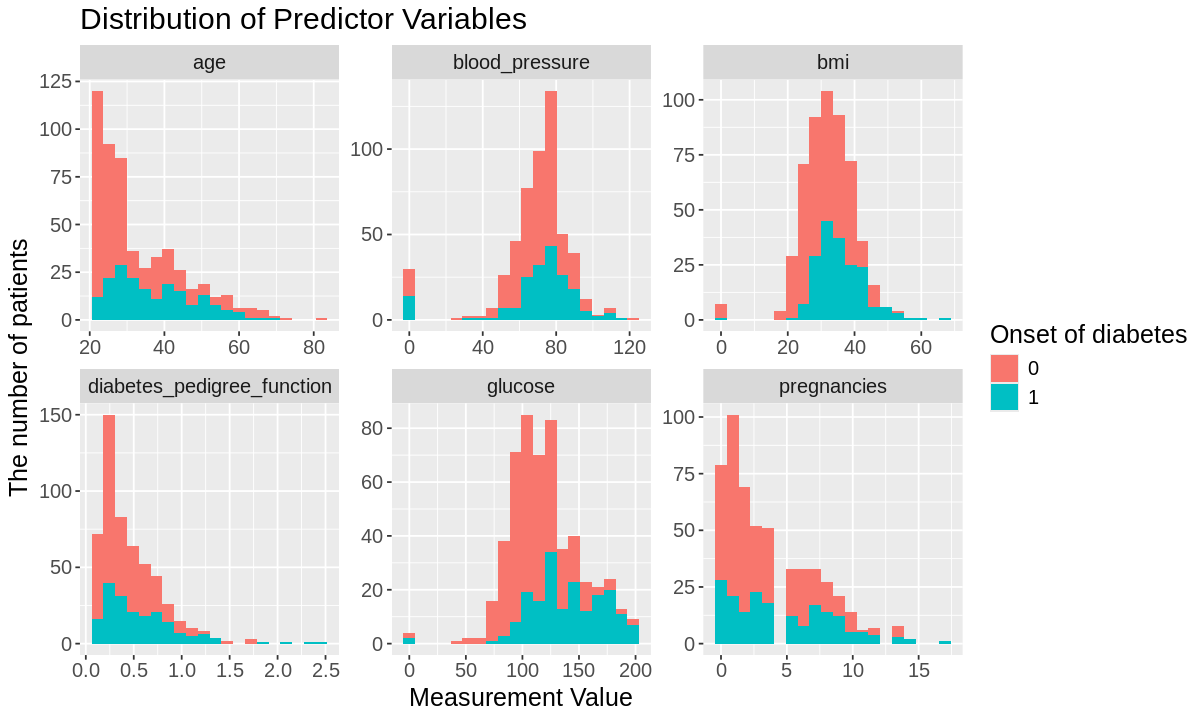

In [11]:
options(repr.plot.width = 10, repr.plot.height = 6)
# plot the distribution of each of the variables and color them by groups
distri <- diabetes_train |>
  select(pregnancies, glucose, blood_pressure, bmi, diabetes_pedigree_function, age, outcome)|>
  pivot_longer(cols = pregnancies:age) |>
  ggplot(aes(x = value, fill = outcome)) +
  geom_histogram(bins = 20) +
  facet_wrap(~ name, scales = "free") +
  labs(title = "Distribution of Predictor Variables", y = "The number of patients", x = "Measurement Value", fill = "Onset of diabetes") +
  theme(text = element_text(size = 15))
distri

Looking at our plot, we found that the distribution of these six variables across different groups differs mainly in terms of the number of people, and this difference will be corrected by upsampling later. The relationship between our six predictor variables and the onset of diabetes is relatively weak, as these predictors lack distinct distribution characteristics, which could adversely affect the accuracy of our model.

## 2. Performs the data analysis:

**1). Set up cross-validation to increase the accuracy**

**2). Create classification recipe and make the training data centered and scaled**

**3). Find the best K value by using `neighbours = tune()` in the k-nearest model function**

In [13]:
set.seed(123) #do not change the value.

options(repr.plot.height = 4, repr.plot.width = 5)
# create recipe using selected variables as predictors
diabetes_mnist_recipe <- recipe(outcome ~ pregnancies + glucose + bmi + blood_pressure + diabetes_pedigree_function + age, data = diabetes_train) |>
                        step_upsample(outcome, over_ratio = 1) |> #correct data imbalance
                        step_scale(all_predictors()) |> #make our variables on a comparable scale and centered
                        step_center(all_predictors())
#
# create 8 fold cross validation
diabetes_mnist_vfold <- vfold_cv(diabetes_train, v = 8, strata = outcome)

# create the KNN spec to determine most accurate K value
diabetes_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# get the results of the prediction where K is between 1 and 50, increment is 1
diabetes_knn_results <- workflow() |>
                 add_recipe(diabetes_mnist_recipe) |>
                 add_model(diabetes_knn_spec) |>  
                 tune_grid(resamples = diabetes_mnist_vfold, grid = tibble(neighbors = seq(1, 50, by = 1))) |>
                 collect_metrics() |>
                 filter(.metric == 'accuracy') 
#find the best k value which is with the highest accuracy
best_k_value <- diabetes_knn_results |>
                 arrange(-mean) |>
                 slice(1:3)
best_k_value


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
27,accuracy,binary,0.7487936,8,0.01779849,Preprocessor1_Model27
28,accuracy,binary,0.7487936,8,0.01779849,Preprocessor1_Model28
33,accuracy,binary,0.7468174,8,0.01501504,Preprocessor1_Model33


From the `best_k_value` table k = 27 or 28 gets the best accuracy.

### 4). Plot the results/accuracies of the K values.

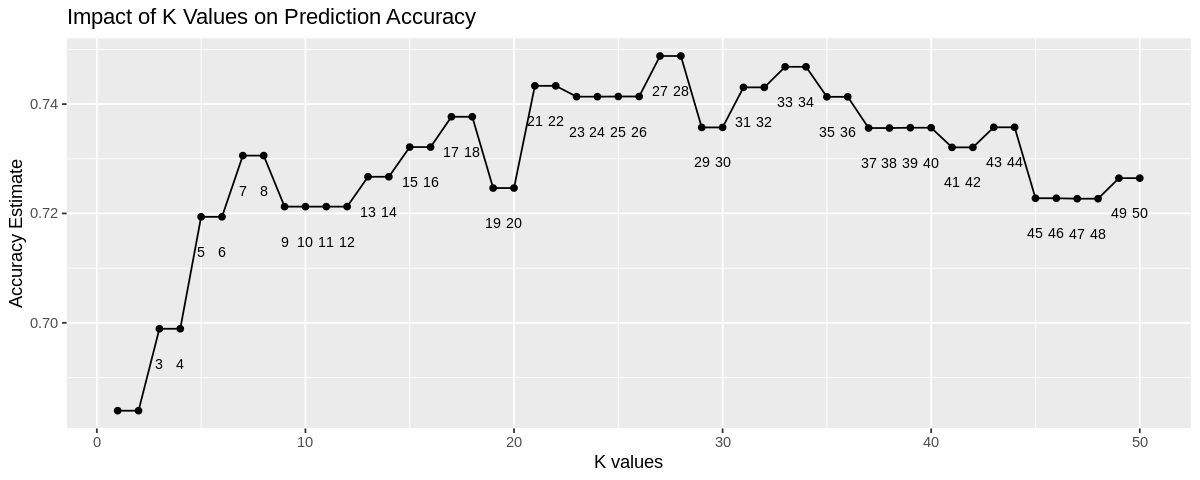

In [14]:
# plot the results/accuracies of the K values
options(repr.plot.height = 4, repr.plot.width = 10)
diabetes_cross_val_plot <- ggplot(diabetes_knn_results, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  geom_text(aes(label = neighbors), size = 3, vjust = 4) +
                  labs(x = 'K values', y = 'Accuracy Estimate', title = "Impact of K Values on Prediction Accuracy") 

diabetes_cross_val_plot

Also, from the graph above we can see that k = 27 or 28 gets the best accuracy, and we will use k = 27 to train our classification model. 

### 5). Train our classification model with the best k value

In [15]:
set.seed(123) #do not change the value.

# create knn spec with k = 27 and we can reuse our previous recipe
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 27) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
                    add_recipe(diabetes_mnist_recipe) |>
                    add_model(knn_spec) |>
                    fit(data = diabetes_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_upsample()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(27,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2342857
Best kernel: rectangular
Best k: 27

## 3. Testing the model

In [19]:
set.seed(123) #do not change the value.

diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
  bind_cols(diabetes_test) #add the column of predictions to the original test data.
head(diabetes_test_predictions)

.pred_class,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
0,5,116,74,0,0,25.6,0.201,30,0
1,10,139,80,0,0,27.1,1.441,57,0
1,5,166,72,19,175,25.8,0.587,51,1


## 4. Evaluating model's performance

In [18]:
#accuracy
diabetes_accuracy <- diabetes_test_predictions |>
  metrics(truth = outcome, estimate = .pred_class) |>
  filter(.metric == "accuracy")

diabetes_accuracy

# Lets first check the order of labels in outcome.
label_order <- diabetes_test_predictions |> pull(outcome) |> levels()
label_order
#since 1 (has diabetes) is the second label, we'll set the "positive" outcome as the second level when computing precision and recall.
#precision
diabetes_precision <- diabetes_test_predictions |>
  precision(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_precision

#recall
diabetes_recall <- diabetes_test_predictions |>
  recall(truth = outcome, estimate = .pred_class, event_level = "second")
diabetes_recall

#confusion matrix
confusion <- diabetes_test_predictions |>
             conf_mat(truth = outcome, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7489177


[1] "0" "1"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6161616


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7530864


          Truth
Prediction   0   1
         0 112  20
         1  38  61

The output shows that our model has an accuracy of around 74.89%, the precision is 61.62% and the recall is 75.31%.

# Discussion
## Summarize what you found

The analysis using a K-Nearest Neighbors classifier on the diabetes dataset yielded an accuracy(74.89%), a precision(61.62%) and a recall(75.31%).
And the relationship between our six predictor variables and the onset of diabetes are sort of weak as our predictors don't have an obvious distribution characteristic with which to improve our accuracy of predicting the onset of diabetes.
  
## Discuss whether this is what you expected to find

The classifier achieved an accuracy of 74.89%, which is decent but might not be high enough for reliable clinical decision-making. The precision is not high enough as well. The recall rate was 75.31%, suggesting that the classifier was relatively good at identifying actual cases of diabetes. However, the risk of missing about a quarter of true positive cases still exists. 
Besides, the analysis showed that the predictor variables have weak relationships with the onset of diabetes, as they do not exhibit strong or distinct distribution characteristics that might enhance the accuracy of predictions.

## Discuss what impact could such findings have

  **1. Accuracy: 74.89%**

It indicates that roughly three-quarters of the predictions made by the model are correct. The model's moderate accuracy suggests that while useful, it might not yet be sufficient for clinical application without further tuning and validation. Like predicting diabetes, higher accuracy is generally preferred due to the serious implications of misdiagnosis. So the accuracy should be improved more.

**2. Precision: 61.62%**

Precision reflects the proportion of diabetes predicted that were actually correct. A precision of 61.6% suggests that when the model predicts diabetes, about 61.62% of those predictions are accurate, while approximately 38.4% are false positives. In medical contexts, especially in chronic conditions like diabetes, a lower precision can lead to unnecessary stress and further medical cost.

**3. Recall: 75.31%**

The recall is the sensitivity of the model.This metric indicates that the model correctly identifies 75.31% of all actual cases of diabetes. This is a critical metric for medical diagnostic tools because a high recall reduces the number of false negatives (missed diagnoses). In our case, it's reasonably high. Reducing misdiagnoses of chronic diseases such as diabetes and hypertension is beneficial as it allows patients to start treatment earlier and slows the progression of the disease.

In medical diagnostics, the trade-off between precision and recall is crucial. Higher recall might be more desirable than precision to ensure fewer missed cases of diabetes, but this often comes at the cost of more false positives. Depending on the healthcare setting, this might be acceptable. 

**4. Confusion Matirx**

As we can see, improving the precision could help reduce the number of false positives—important in medical settings to avoid unnecessary treatments.

## Discuss what future questions could this lead to
**How can the model's precision and recall be improved?**
  
Future work could explore integrating lifestyle factors like diet and physical activity to enhance predictive power. Additionally, deploying the model across diverse demographics could help tailor diabetes screening and prevention strategies more effectively.

**Would other algorithms offer better performance?**

Exploring different models might yield better results.

**Which features most strongly predict diabetes, and are there other variables that should be considered?**

Investigating the impact of lifestyle factors and genetics could be insightful.

**Does the model perform equally well across different demographics?**

Analyzing the model's performance across various age groups, ethnicities, and genders could uncover important disparities in diabetes prevalence..


# Bibliography  * Center for Disease Control and Prevention (2023). CDC
  https://www.cdc.gov/diabetes/basics/diabetes.html#:~:text=Diabetes%20is%20a%20chronic%20
* Pima Indians Diabetes Database (n.d.). Kaggle
  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
* The creators of the Pima Indians Diabetes database:
  Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.Press. 
